In [129]:
from vtk import *
from vtk.util import numpy_support as VN
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import patches
import matplotlib.ticker as ticker
from matplotlib.ticker import MultipleLocator
mpl.rcParams['font.family'] = 'Arial'  #default font family
mpl.rcParams['mathtext.fontset'] = 'cm' #font for math

datapath='/Users/zguo/Downloads'
lut_vtu='%s/lut_constP_XH_8.vtu'%(datapath)

In [134]:
def extractVTKFile(inputVTKFile):
    data={'points':[],'cells':[],'point_data':{},'cell_data':{}}
    extension=inputVTKFile.split('.')[-1]
    reader,writer=[],[]
    if(extension=='vtu'):
        reader=vtkXMLUnstructuredGridReader()
        writer=vtkXMLUnstructuredGridWriter()
    elif(extension=='vtk'):
        reader=vtkUnstructuredGridReader()
        writer=vtkUnstructuredGridWriter()
    else:
        ERROR('Unrecognized vtk file type: %s, the supported format is vtu'%(extension))
    reader.SetFileName(inputVTKFile)
    reader.Update()
    grid=reader.GetOutput()
    # point fields
    num_pointDataField=grid.GetPointData().GetNumberOfArrays()
    for i in range(0,num_pointDataField):
        fieldName=grid.GetPointData().GetArrayName(i)
        data['point_data'][fieldName]=VN.vtk_to_numpy(grid.GetPointData().GetArray(i))
    # points 
    points = grid.GetPoints()
    nPoints = points.GetNumberOfPoints()
    data['points']=VN.vtk_to_numpy(points.GetData())
    # cells
    cells = grid.GetCells()
    cells = VN.vtk_to_numpy(cells.GetData())
    nCells = grid.GetNumberOfCells()
    n=0
    for i in range(0,nCells):
        np=cells[n]
        start=n+1
        inds=cells[start:start+np]
        n = 1+np
        data['cells'].append(inds)
    return data

In [156]:
data = extractVTKFile(lut_vtu)
print(data['point_data'].keys())
aa=data['point_data']['Bulk density']
aa[np.isnan(aa)]=0
print(aa.shape,aa)

dict_keys(['Bulk density', 'Bulk specific enthalpy', 'Temperature'])
(25433,) [1007.94 1003.71 1001.02 ...    0.      0.      0.  ]


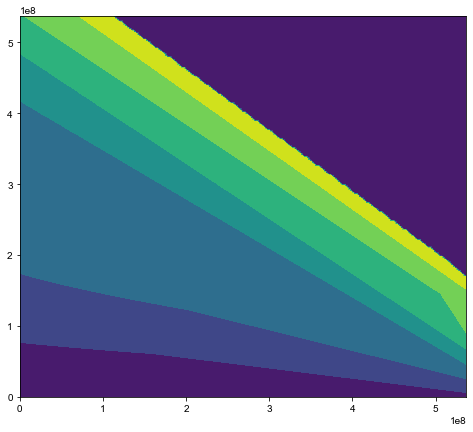

In [161]:
# plot
fig,axes=plt.subplots(1,1,figsize=(8,7))

triang=mpl.tri.Triangulation(data['points'][:,0],data['points'][:,1])
ax=axes
ax.tricontourf(triang, data['point_data']['Temperature'])

plt.show()